In [ ]:
!pip install pillow

Take a image 512X512 image , Xhr

In [ ]:
from PIL import Image

def resize_image(input_image_path, output_image_path, size):
    original_image = Image.open(input_image_path)
    resized_image = original_image.resize(size)
    resized_image.save(output_image_path)
    return resized_image.size  # Return the size of the resized image

input_image_path = "/content/monkey.png"  # Replace with the path to your input image
output_image_path = "xhr.jpg"  # Replace with the desired path for the output image
desired_size = (512, 512)

resized_size = resize_image(input_image_path, output_image_path, desired_size)
print("Resized image size:", resized_size)


Resized image size: (512, 512)


Obtain a 256X256 image from the above , Xlr

In [ ]:
from PIL import Image

def resize_image(input_image_path, output_image_path, size):
    original_image = Image.open(input_image_path)
    resized_image = original_image.resize(size)
    resized_image.save(output_image_path)
    return resized_image.size  # Return the size of the resized image

input_image_path = "/content/monkey.png"  # Replace with the path to your input image
output_image_path = "xlr.jpg"  # Replace with the desired path for the output image
desired_size = (256, 256)

resized_size = resize_image(input_image_path, output_image_path, desired_size)
print("Resized image size:", resized_size)

Resized image size: (256, 256)


Upsample by a factor of 2 Xip

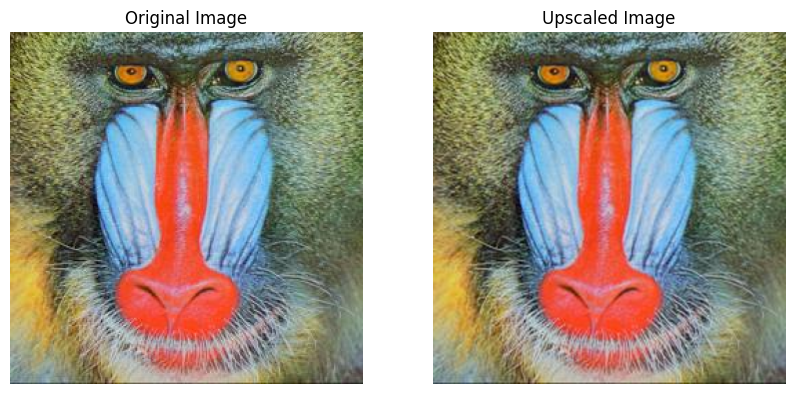

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def upsample_image(input_image_path, output_image_path):
    original_image = Image.open(input_image_path)
    width, height = original_image.size
    upscaled_image = original_image.resize((width*2, height*2), resample=Image.BICUBIC)  # Bicubic interpolation for better quality
    upscaled_image.save(output_image_path)
    return upscaled_image

input_image_path = "/content/xlr.jpg"  # Replace with the path to your input image
output_image_path = "Xip.jpg"  # Replace with the desired path for the upscaled image

upscaled_image = upsample_image(input_image_path, output_image_path)

# Displaying both original and upsampled images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(Image.open(input_image_path))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(upscaled_image)
axes[1].set_title('Upscaled Image')
axes[1].axis('off')

plt.show()

In [ ]:
! git clone https://github.com/yjn870/RDN-pytorch

Cloning into 'RDN-pytorch'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 36 (delta 0), reused 2 (delta 0), pack-reused 32
Receiving objects: 100% (36/36), 3.57 MiB | 8.01 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
!pip install h5py

In [ ]:
!pip install tqdm

In [ ]:
!python /content/RDN-pytorch/test.py --weights-file "rdn_x4.pth" --image-file "/content/monkey.png" --scale 4 --num-features 64 --growth-rate 64 --num-blocks 16 --num-layers 8


sfe1.weight 1728
sfe1.bias 64
sfe2.weight 36864
sfe2.bias 64
rdbs.0.layers.0.conv.weight 36864
rdbs.0.layers.0.conv.bias 64
rdbs.0.layers.1.conv.weight 73728
rdbs.0.layers.1.conv.bias 64
rdbs.0.layers.2.conv.weight 110592
rdbs.0.layers.2.conv.bias 64
rdbs.0.layers.3.conv.weight 147456
rdbs.0.layers.3.conv.bias 64
rdbs.0.layers.4.conv.weight 184320
rdbs.0.layers.4.conv.bias 64
rdbs.0.layers.5.conv.weight 221184
rdbs.0.layers.5.conv.bias 64
rdbs.0.layers.6.conv.weight 258048
rdbs.0.layers.6.conv.bias 64
rdbs.0.layers.7.conv.weight 294912
rdbs.0.layers.7.conv.bias 64
rdbs.0.lff.weight 36864
rdbs.0.lff.bias 64
rdbs.1.layers.0.conv.weight 36864
rdbs.1.layers.0.conv.bias 64
rdbs.1.layers.1.conv.weight 73728
rdbs.1.layers.1.conv.bias 64
rdbs.1.layers.2.conv.weight 110592
rdbs.1.layers.2.conv.bias 64
rdbs.1.layers.3.conv.weight 147456
rdbs.1.layers.3.conv.bias 64
rdbs.1.layers.4.conv.weight 184320
rdbs.1.layers.4.conv.bias 64
rdbs.1.layers.5.conv.weight 221184
rdbs.1.layers.5.conv.bias 64
rdbs

Total Parameters: 22271107 **PSNR**
PSNR (RDN): 23.23
PSNR (Bilinear): 22.45
PSNR (Bicubic): 22.66

In [ ]:
!pip install torchmetrics lpips


**SSIM**

In [ ]:
import numpy as np
import cv2

def compute_ssim(img1, img2, win_size=7, K1=0.01, K2=0.03, L=255):
    # Convert images to float32
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)

    # Constants for numerical stability
    C1 = (K1 * L) ** 2
    C2 = (K2 * L) ** 2

    # Mean of input images
    mu1 = cv2.GaussianBlur(img1, (win_size, win_size), 1.5)
    mu2 = cv2.GaussianBlur(img2, (win_size, win_size), 1.5)

    # Squared means and variance
    mu1_sq = mu1 ** 2
    mu2_sq = mu2 ** 2
    mu1_mu2 = mu1 * mu2

    # Variance and covariance
    sigma1_sq = cv2.GaussianBlur(img1 ** 2, (win_size, win_size), 1.5) - mu1_sq
    sigma2_sq = cv2.GaussianBlur(img2 ** 2, (win_size, win_size), 1.5) - mu2_sq
    sigma12 = cv2.GaussianBlur(img1 * img2, (win_size, win_size), 1.5) - mu1_mu2

    # SSIM formula
    numerator = (2 * mu1_mu2 + C1) * (2 * sigma12 + C2)
    denominator = (mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2)

    ssim_map = numerator / denominator
    return np.mean(ssim_map)

# Load the input and output images
input_img = cv2.imread("/content/monkey.png", cv2.IMREAD_GRAYSCALE)
output_img = cv2.imread("/content/monkey_rdn_x4.png", cv2.IMREAD_GRAYSCALE)

# Resize images to match if necessary
# input_img = cv2.resize(input_img, (width, height))
# output_img = cv2.resize(output_img, (width, height))

# Calculate SSIM
ssim_score = compute_ssim(input_img, output_img)

print("SSIM score:", ssim_score)


SSIM score: 0.52103156


In [ ]:
# Load the input and output images
input_img = cv2.imread("/content/monkey.png", cv2.IMREAD_GRAYSCALE)
output_img = cv2.imread("/content/monkey_bilinear_x4.png", cv2.IMREAD_GRAYSCALE)

# Resize images to match if necessary
# input_img = cv2.resize(input_img, (width, height))
# output_img = cv2.resize(output_img, (width, height))

# Calculate SSIM
ssim_score = compute_ssim(input_img, output_img)

print("SSIM score:", ssim_score)


SSIM score: 0.40636283


In [ ]:
# Load the input and output images
input_img = cv2.imread("/content/monkey.png", cv2.IMREAD_GRAYSCALE)
output_img = cv2.imread("/content/monkey_bicubic_x4.png", cv2.IMREAD_GRAYSCALE)

# Resize images to match if necessary
# input_img = cv2.resize(input_img, (width, height))
# output_img = cv2.resize(output_img, (width, height))

# Calculate SSIM
ssim_score = compute_ssim(input_img, output_img)

print("SSIM score:", ssim_score)


SSIM score: 0.43372527


**LPIPS**

In [ ]:
import cv2
import lpips

# Load the input and generated images
input_img = cv2.imread("/content/monkey.png")
generated_img = cv2.imread("/content/monkey_rdn_x4.png")

# Convert images to tensors for LPIPS calculation
input_tensor = lpips.im2tensor(input_img)
generated_tensor = lpips.im2tensor(generated_img)

# Calculate LPIPS distance
loss_fn = lpips.LPIPS(net='vgg')
lpips_distance = loss_fn.forward(input_tensor, generated_tensor)

print("LPIPS distance:", lpips_distance.item())


Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/vgg.pth
LPIPS distance: 0.40724483132362366


In [ ]:
import cv2
import lpips

# Load the input and generated images
input_img = cv2.imread("/content/monkey.png")
generated_img = cv2.imread("/content/monkey_bilinear_x4.png")

# Convert images to tensors for LPIPS calculation
input_tensor = lpips.im2tensor(input_img)
generated_tensor = lpips.im2tensor(generated_img)

# Calculate LPIPS distance
loss_fn = lpips.LPIPS(net='vgg')
lpips_distance = loss_fn.forward(input_tensor, generated_tensor)

print("LPIPS distance:", lpips_distance.item())

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/vgg.pth
LPIPS distance: 0.4732758700847626


In [ ]:
import cv2
import lpips

# Load the input and generated images
input_img = cv2.imread("/content/monkey.png")
generated_img = cv2.imread("/content/monkey_bicubic_x4.png")

# Convert images to tensors for LPIPS calculation
input_tensor = lpips.im2tensor(input_img)
generated_tensor = lpips.im2tensor(generated_img)

# Calculate LPIPS distance
loss_fn = lpips.LPIPS(net='vgg')
lpips_distance = loss_fn.forward(input_tensor, generated_tensor)

print("LPIPS distance:", lpips_distance.item())

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/vgg.pth
LPIPS distance: 0.457386314868927


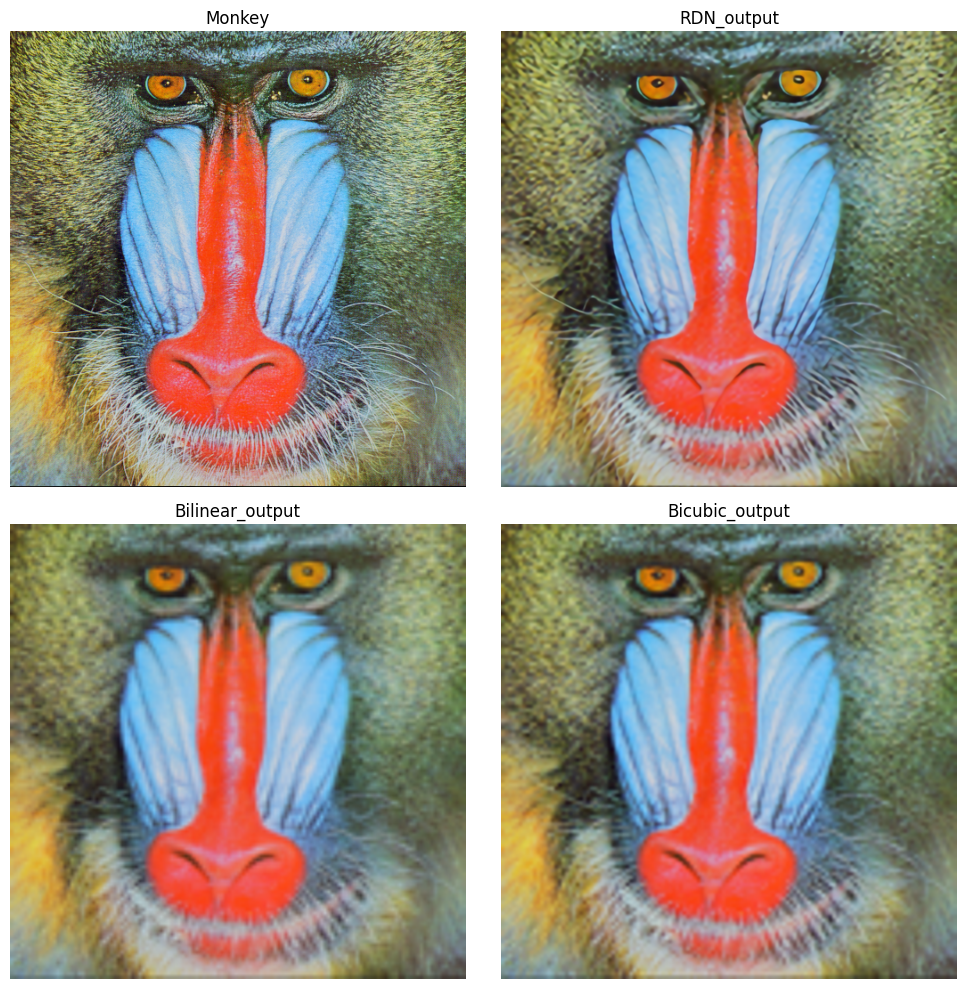

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# List of image paths and corresponding titles
image_data = [
    ("/content/monkey.png", "Monkey"),
    ("/content/monkey_rdn_x4.png", "RDN_output"),
    ("/content/monkey_bilinear_x4.png", "Bilinear_output"),
    ("/content/monkey_bicubic_x4.png", "Bicubic_output")
]

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Iterate through each image path and plot it in the corresponding subplot
for i, (image_path, title) in enumerate(image_data):
    img = mpimg.imread(image_path)
    ax = axes.flat[i]
    ax.imshow(img)
    ax.axis('off')  # Turn off axis
    ax.set_title(title)  # Set title for the subplot

plt.tight_layout()  # Adjust layout
plt.show()


**Edge Detection**

Original Image:


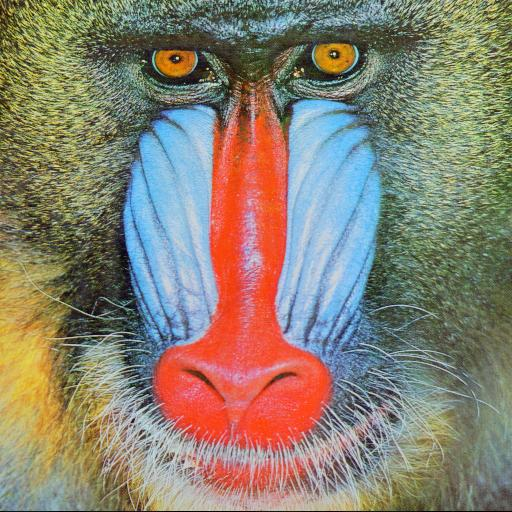

Edges Detected:


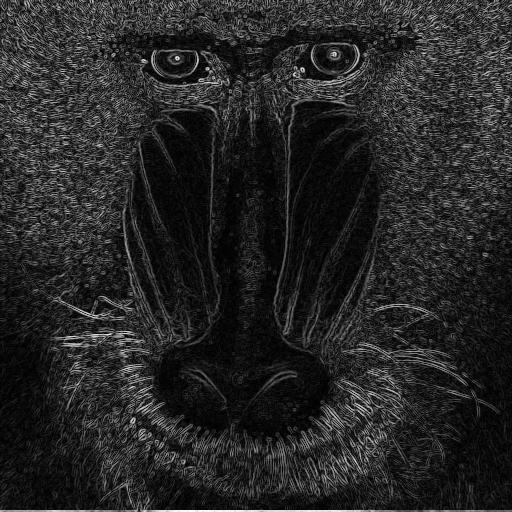

In [ ]:
import numpy as np
from PIL import Image

def sobel_operator(image):
    # Convert the image to grayscale
    gray_image = image.convert('L')

    # Convert the grayscale image to a numpy array
    img_array = np.array(gray_image, dtype=float)

    # Define the Sobel operator kernels
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Convolve the image with the Sobel kernels
    gradient_x = convolve(img_array, kernel_x)
    gradient_y = convolve(img_array, kernel_y)

    # Compute the magnitude of the gradients
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Normalize the gradient magnitude to range [0, 255]
    gradient_magnitude *= 255.0 / gradient_magnitude.max()

    # Convert the gradient magnitude to uint8
    gradient_magnitude = gradient_magnitude.astype(np.uint8)

    return Image.fromarray(gradient_magnitude)

def convolve(image, kernel):
    # Get image dimensions
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Pad the image to handle borders
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='edge')

    # Initialize an empty output image
    output_image = np.zeros_like(image)

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            output_image[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output_image

# Load the image
image = Image.open('/content/monkey.png')

# Apply Sobel edge detection
edges = sobel_operator(image)

# Save the images to files
image.save('original_image.jpg')
edges.save('edges_detected.jpg')

# Provide file paths to the saved images
print("Original Image:")
display(Image.open('original_image.jpg'))

print("Edges Detected:")
display(Image.open('edges_detected.jpg'))


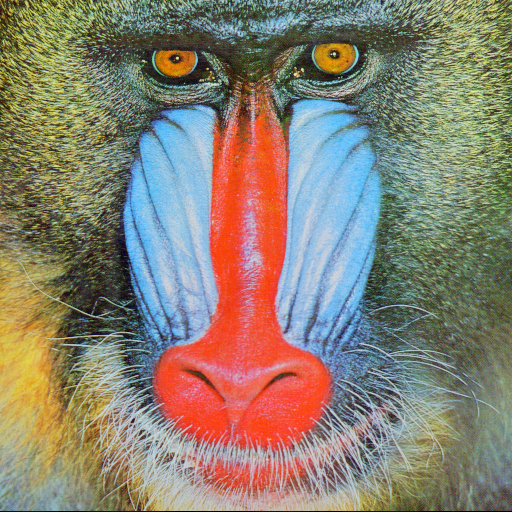

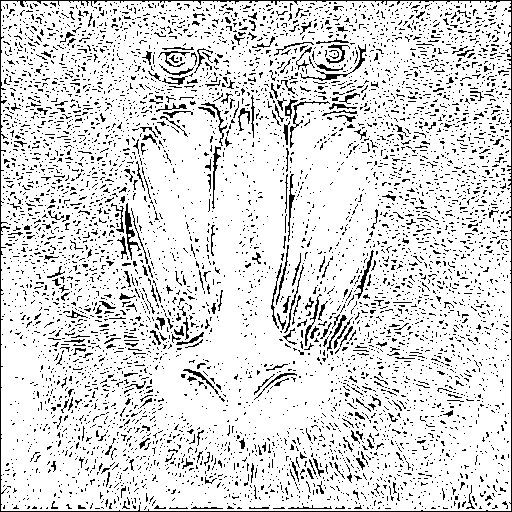

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def LoG_edge_detection(image, sigma):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray_image, (0, 0), sigma)

    # Compute Laplacian of Gaussian
    LoG = cv2.Laplacian(blurred, cv2.CV_64F)

    # Find zero crossings
    edge_image = np.zeros_like(LoG)
    for i in range(1, LoG.shape[0] - 1):
        for j in range(1, LoG.shape[1] - 1):
            neighbors = LoG[i-1:i+2, j-1:j+2]
            if np.any(np.sign(neighbors) != np.sign(LoG[i, j])):
                edge_image[i, j] = 255

    # Convert edge image to uint8
    edge_image = edge_image.astype(np.uint8)

    return edge_image

# Load the image
image = cv2.imread('/content/monkey.png')

# Set the sigma value for LoG filter (adjust as needed)
sigma = 1.5

# Perform LoG edge detection
edges = LoG_edge_detection(image, sigma)

# Display the original image and the detected edges
cv2_imshow(image)
cv2_imshow(edges)
